# Waffle Charts

By **Franklin Oliveira**

-----
This notebook contains all code necessary to make charts from `repteis` database with focus on time and space exploration. Here you'll find some basic data treatment and charts' code. 

Database: <font color='blue'>'Compilacao Livros Repteis - 2 a 10 - 2020_04_28.xls'</font>.m
    

## Basic imports

In [2]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from collections import defaultdict

# this package does most of the heavy work of constructing the Waffle Charts
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html
from pywaffle import Waffle 

# alt.renderers.enable('default')

## Importing data...

In [3]:
NewTable = pd.read_csv('./data/treated_db.csv', sep=';', encoding='utf-8-sig')

/home/franklin/anaconda3/envs/viz/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<br>

<font size=5>**Paleta de cores por Ordem**</font>

Abaixo está a imagem usada como inspiração (https://color.adobe.com/create/image)

<img src="./src/paleta_cores.jpeg" width='500px'>

Cores: 

- verde_escuro: #284021
- verde_claro: #88BF11
- amarelo: #D9CB0B
- laranja: #D99311
- laranja_escuro: #BF4417
- marrom-_laro: #BF8D7A

In [4]:
# 220 NaNs
NewTable['ordem'].value_counts(dropna=False)

Squamata       21993
Testudines       846
Crocodylia       257
NaN               32
Gymnophiona        2
Caudata            1
Serpentes          1
Name: ordem, dtype: int64

In [5]:
# p.s.: Caudata is an error and should be removed
cores_ordem = {
    'Squamata': '#BF4417',
    'Testudines': '#D9CB0B', 
    'Crocodylia': '#284021'
}

ordens = list(cores_ordem.keys())
cores = list(cores_ordem.values())

**Paleta de Cores - Família:**

- grupo 1: 1 cor  (verde escuro)
<ul>
    <li style="color:#142611"><b>centroide 1</b></li>
</ul>
- grupo 2: 8 cores
<ul>
    <li style="color:#85D907"><b>centroide 2</b></li>
</ul>

['#d7ff81', '#bafd62', '#9feb3f', '#85d907', '#6cc700', '#52b700', '#35a600', '#0b9700', '#008800']

<font color="#d7ff81"><b>cor 1</b> (ficou fora)</font>
<font color="#bafd62"><b>cor 2</b></font>
<font color="#9feb3f"><b>cor 3</b></font>
<font color="#85d907"><b>cor 4</b></font>
<font color="#6cc700"><b>cor 5</b></font>
<font color="#52b700"><b>cor 6</b></font>
<font color="#35a600"><b>cor 7</b></font>
<font color="#0b9700"><b>cor 8</b></font>
<font color="#008800"><b>cor 9</b></font>


- grupo 3: 2 cores
#888C03
<ul>
    <li style="color:#22401E"><b>centroide 3 (puxando para tons frios mais claros)</b></li>
</ul>

<font color="#99b6b2"><b>cor 1</b></font>
<font color="#81a58b"><b>cor 2</b></font>


- grupo 4: 1 cor  (amarelo)
<ul>
    <li style="color:#F2CB07"><b>centroide 4</b></li>
</ul>

- grupo 5: 10 cores
<ul>
    <li style="color:#cb97d4"><b>centroide 5 (puxando para o roxo)</b></li>
</ul>

['#f8dcf9', '#ebc5ed', '#ddafe2', '#ce9ad6', '#bf86cc', '#af73c2', '#a160b8', '#924fae', '#833fa4'] #803da1

<font color="#f8dcf9"><b>cor 1</b></font>
<font color="#ebc5ed"><b>cor 2</b></font>
<font color="#ddafe2"><b>cor 3</b></font>
<font color="#ce9ad6"><b>cor 4</b></font>
<font color="#bf86cc"><b>cor 5</b></font>
<font color="#af73c2"><b>cor 6</b></font>
<font color="#a160b8"><b>cor 7</b></font>
<font color="#924fae"><b>cor 8</b></font>
<font color="#833fa4"><b>cor 9</b></font>
<font color="#803da1"><b>cor 10</b></font>


- grupo 6: 12 cores
<ul>
    <li style="color:#91F2E9"><b>centroide 6</b></li>
</ul>

['#c9fff9', '#b3eff2', '#9cdcea', '#83c9e2', '#68b7da', '#4aa6d2', '#2096ca', '#0087c1', '#0079b7']

['#cee5d8', '#b3d2d1', '#9bbfc9', '#83adc2', '#6d9bba', '#568ab2', '#3e7baa', '#226ca2', '#005e98']


<font color="#c9fff9"><b>cor 1</b></font>
<font color="#b3eff2"><b>cor 2</b></font>
<font color="#9cdcea"><b>cor 3</b></font>
<font color="#83c9e2"><b>cor 4</b></font>
<font color="#68b7da"><b>cor 5</b></font>
<font color="#4aa6d2"><b>cor 6</b></font>
<font color="#2096ca"><b>cor 7</b></font>
<font color="#0087c1"><b>cor 8</b></font>
<font color="#0079b7"><b>cor 9</b></font>
<font color="#3e7baa"><b>cor 10</b></font>
<font color="#226ca2"><b>cor 11</b></font>
<font color="#005e98"><b>cor 12</b></font>


- grupo 7: 3 cores
<ul>
    <li style="color:#8C1A0F"><b>centroide 7 (puxando para o marrom)</b></li>
</ul>

['#fde5bf', '#efd09f', '#e1bb82', '#d3a767', '#c6934d', '#b98033', '#ac6f18', '#9e5e00', '#914e00']

<font color="#ac6f18"><b>cor 1</b></font>
<font color="#9e5e00"><b>cor 2</b></font>
<font color="#914e00"><b>cor 3</b></font>


- grupo 8: 13 cores
<ul>
    <li style="color:#D9430D"><b>centroide 8</b></li>
</ul>

['#ffce9f', '#ffb683', '#ff9f69', '#ff8851', '#f5723b', '#e75b25', '#d9430d', '#cb2800', '#bc0000']

['#ff8f68', '#ff7e56', '#ff6b40', '#ee5829', '#d9430d', '#c62f00', '#b41b00', '#a40300', '#930000']

<font color="#ffce9f"><b>cor 1</b></font>
<font color="#ffb683"><b>cor 2</b></font>
<font color="#ff9f69"><b>cor 3</b></font>
<font color="#ff8851"><b>cor 4</b></font>
<font color="#f5723b"><b>cor 5</b></font>
<font color="#e75b25"><b>cor 6</b></font>
<font color="#d9430d"><b>cor 7</b></font>
<font color="#cb2800"><b>cor 8</b></font>
<font color="#bc0000"><b>cor 9</b></font>
<font color="#c62f00"><b>cor 10</b></font>
<font color="#b41b00"><b>cor 11</b></font>
<font color="#a40300"><b>cor 12</b></font>
<font color="#930000"><b>cor 13</b></font>

<br>

**TOTAL: 50 cores**

In [6]:
cores_familia = {
    # known errors treatment
#     '#n/d':'#000000',
#     'nan':'#000000',
    # grupo 1: Crocodylia
    'Alligatoridae':'#142611',
    # grupo 2: Testudines - Cryptodira
    'Cheloniidae':'#bafd62',
    'Chelydridae':'#9feb3f',
    'Dermochelyidae':'#85d907',
    'Emydidae':'#6cc700',
    'Geoemydidae':'#52b700',
    'Kinosternidae':'#35a600',
    'Testudinidae':'#0b9700',
    'Trionychidae':'#008800',
    # grupo 3: Testudines - Pleurodira
    'Chelidae':'#99b6b2' ,
    'Podocnemididae':'#81a58b',
    # grupo 4: Amphisbaenia - Amphisbaenia
    'Amphisbaenidae':'#F2CB07',
    # grupo 5: Sauria - Iguania
    'Agamidae':'#f8dcf9',
    'Chamaeleonidae':'#ebc5ed',
    'Dactyloidae':'#ddafe2',
    'Iguanidae':'#ce9ad6',
    'Hoplocercidae':'#bf86cc',
    'Leiosauridae':'#af73c2',
    'Liolaemidae':'#a160b8', 
    'Phrynosomatidae':'#924fae',
    'Polychrotidae':'#833fa4',
    'Tropiduridae':'#803da1',
    # grupo 6: Sauria - Scleroglossa
    'Anguidae':'#c9fff9',
    'Gekkonidae':'#b3eff2',
    'Gymnophthalmidae':'#9cdcea',
    'Helodermatidae':'#83c9e2',
    'Lacertidae':'#68b7da',
    'Mabuyinae':'#4aa6d2',
    'Phyllodactylidae':'#2096ca',
    'Scincidae':'#0087c1',
    'Sphaerodactylidae':'#0079b7',
    'Teiidae':'#3e7baa',
    'Varanidae':'#226ca2',
    'Xantusiidae':'#005e98',
    # grupo 7: Serpentes - Scolecophidia
    'Anomalepididae':'#ac6f18',
    'Leptotyphlopidae':'#9e5e00',
    'Typhlopidae':'#914e00', 
    # grupo 8: Alethinophidia
    'Aniliidae':'#ffce9f',
    'Boidae':'#ffb683',
    'Colubridae':'#ff9f69',
    'Dipsadidae':'#ff8851',
    'Elapidae':'#f5723b',
    'Homalopsidae':'#e75b25',
    'Lamprophiidae':'#d9430d', 
    'Loxocemidae':'#cb2800',
    'Natricidae':'#bc0000',
    'Pythonidae':'#c62f00',
    'Tropidophiidae':'#b41b00',
    'Viperidae':'#a40300',
    'Xenopeltidae':'#930000'
}

In [7]:
# cores por grupo
cores_grupo = {
    'grupo 1':'#142611',
    'grupo 2':'#85D907',
    'grupo 3':'#81a58b',
    'grupo 4':'#F2CB07',
    'grupo 5':'#cb97d4',
    'grupo 6':'#91F2E9',
    'grupo 7':'#8C1A0F',
    'grupo 8':'#D9430D'
}

<br>

### identificadores por grupo

preciso criar listas para identificar em qual grupo cada família está. 

In [81]:
grupo1 = ['Alligatoridae']
grupo2 = ['Cheloniidae', 'Chelydridae', 'Dermochelyidae', 'Emydidae', 'Geoemydidae', 'Kinosternidae',
          'Testudinidae', 'Trionychidae']
grupo3 = ['Chelidae', 'Podocnemididae']
grupo4 = ['Amphisbaenidae']
grupo5 = ['Agamidae','Chamaeleonidae','Dactyloidae','Iguanidae','Hoplocercidae',
          'Leiosauridae','Liolaemidae', 'Phrynosomatidae','Polychrotidae','Tropiduridae']
grupo6 = ['Anguidae','Gekkonidae','Gymnophthalmidae','Helodermatidae','Lacertidae','Mabuyinae',
          'Phyllodactylidae','Scincidae','Sphaerodactylidae','Teiidae','Varanidae','Xantusiidae']
grupo7 = ['Anomalepididae','Leptotyphlopidae','Typhlopidae']
grupo8 = ['Aniliidae','Boidae','Colubridae','Dipsadidae','Elapidae','Homalopsidae','Lamprophiidae',
          'Loxocemidae','Natricidae','Pythonidae','Tropidophiidae','Viperidae','Xenopeltidae']

# todos os grupos
grupos = [grupo1, grupo2, grupo3, grupo4, grupo5, grupo6, grupo7, grupo8]

# nomes dos grupos para exibição
nomes_grupos = {
    'grupo 1':'Crocodylia',
    'grupo 2':'Testudines - Cryptodira',
    'grupo 3':'Testudines - Pleurodira',
    'grupo 4':'Amphisbaenia',
    'grupo 5':'Sauria - Iguania',
    'grupo 6':'Sauria - Scleroglossa',
    'grupo 7':'Serpentes - Scolecophidia',
    'grupo 8':'Alethinophidia'
}

## Waffle Charts

----

### 1- Orders

In [9]:
def calcPercentages(df, col='order', discard_col= 'index'):
    
    if discard_col == 'index':
        temp = df.reset_index()
    else:
        temp = df
    
    percent = temp.groupby(col).count()[discard_col].reset_index().rename(
                                                                    columns={discard_col:'counts'})
    percent['percent'] = percent['counts'] / percent['counts'].sum()
    percent['percent'] = percent['percent'] * 100
    
    return percent

In [10]:
percent = calcPercentages(NewTable, col='ordem')
percent = percent[percent['ordem'].isin(ordens)].copy()

percent

,ordem,counts,percent
1,Crocodylia,257,1.112554
4,Squamata,21993,95.207792
5,Testudines,846,3.662338


In [11]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['ordem'].apply(lambda x: cores_ordem[x])

In [12]:
percent.sort_values('percent', inplace=True)

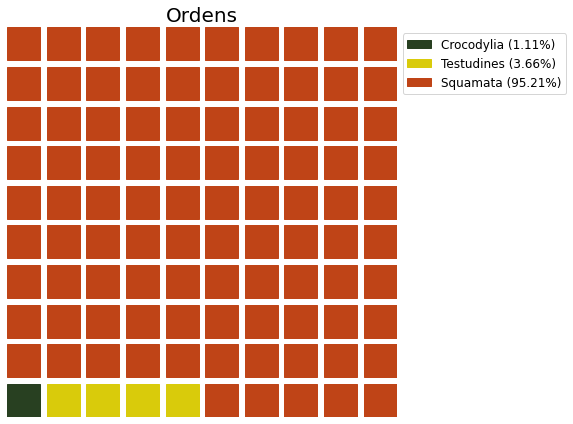

In [13]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='nearest',
    values=[round(i) for i in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': 'Ordens', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['ordem'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize':12},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/ordens.svg')
# plt.savefig('./graphs/waffles/ordens.png')

plt.show()

<br>

## Ideia:

fazer gráficos por grupo (da paleta de cores) e, depois, um waffle para as famílias de cada grupo. 

1. % por grupos da paleta
2. % por familia do grupo 1
...

In [98]:
def identificaGrupo(grupos, familia):
    for i in range(len(grupos)):
        if familia in grupos[i]:
            return f'grupo {i+1}'
    return 'Nan'

In [99]:
NewTable['grupo'] = NewTable['familia'].apply(lambda x: identificaGrupo(grupos, x))

In [104]:
percent = calcPercentages(NewTable, col='grupo')
percent = percent[percent['grupo'] != 'Nan']

# adicionando coluna com as cores por ordem
percent['cores'] = percent['grupo'].apply(lambda x: cores_grupo[x])

# ordenando percentuais
# percent.sort_values('percent', inplace=True)

In [105]:
percent['nomes_exibicao'] = percent['grupo'].apply(lambda x: nomes_grupos[x])

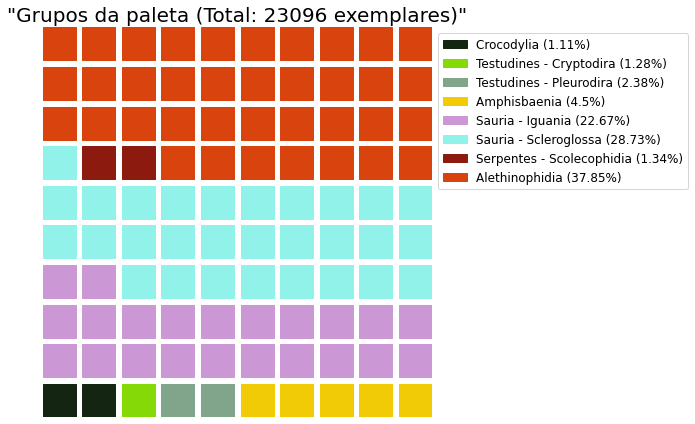

In [107]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='nearest',
    values=[round(i,2) for i in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': '"Grupos da paleta (Total: 23096 exemplares)"', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['nomes_exibicao'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize':12},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/grupos-da-paleta.svg')
plt.savefig('./graphs/waffles/grupos-da-paleta.png')

plt.show()

<br>

### continuando ideia

fazer um waffle para as famílias de um certo grupo

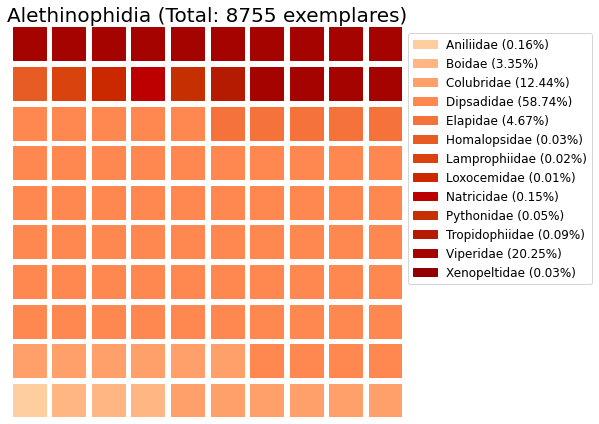

In [95]:
# 1. filtrar tabela por grupo
temp = NewTable[NewTable['grupo'] == 'grupo 8'].copy()

# 2. calcular percentagens
percent = calcPercentages(temp, col='familia')

# 3. identificar cores
percent['cores'] = percent['familia'].apply(lambda x: cores_familia[x])

# ordenando percentuais
# percent.sort_values('percent', inplace=True)
total = percent['counts'].sum()

# nome do grupo para exibição
nome = nomes_grupos['grupo 8']

# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='nearest',
    values=[round(j,2) for j in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': f'{nome} (Total: {total} exemplares)', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['familia'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize':12},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('./graphs/waffles/grupos/grupo8.svg')
plt.savefig('./graphs/waffles/grupos/grupo8.png')

plt.show()

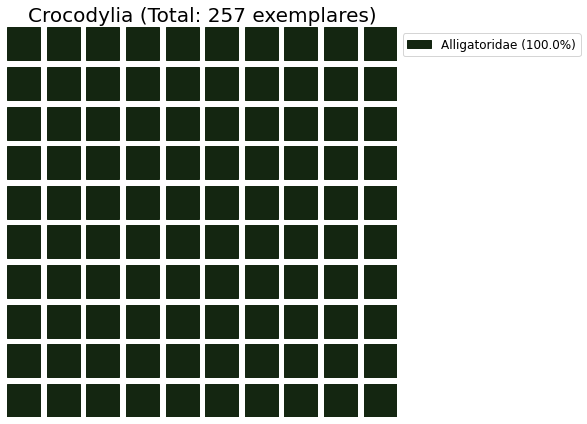

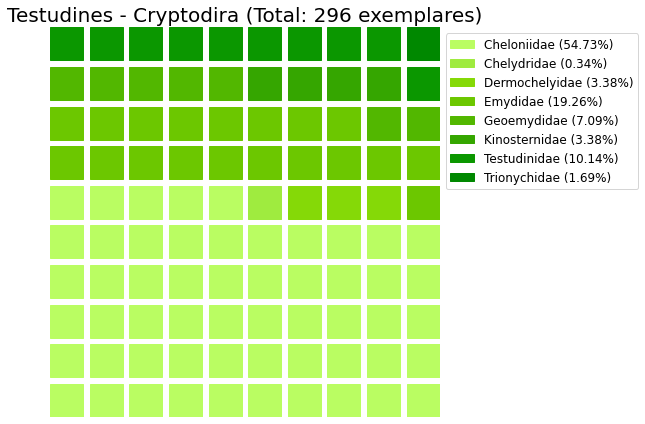

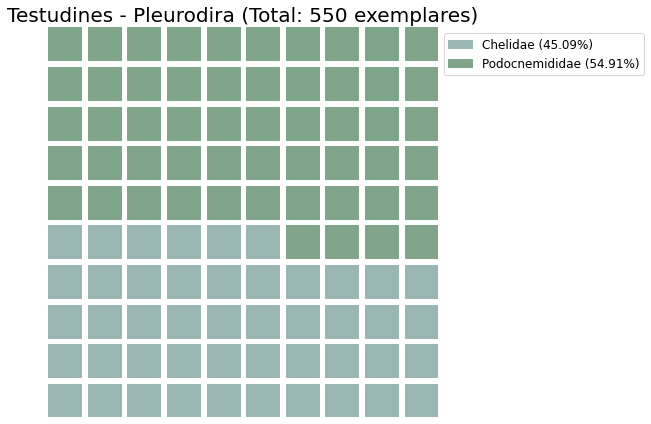

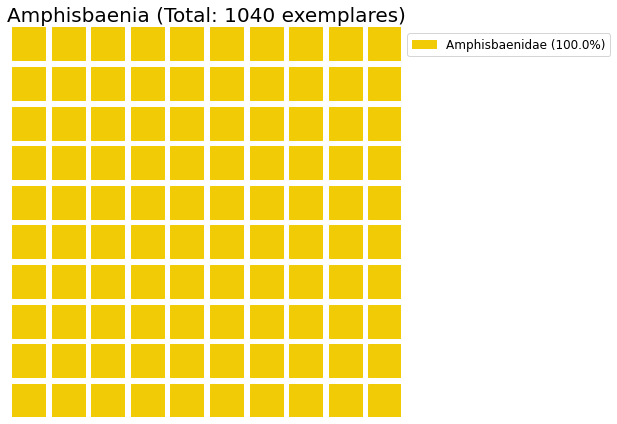

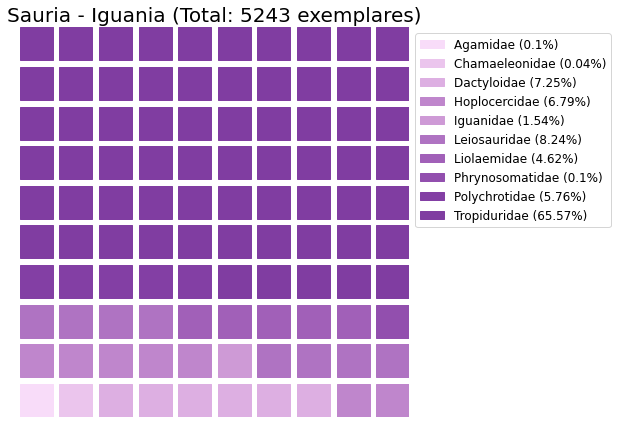

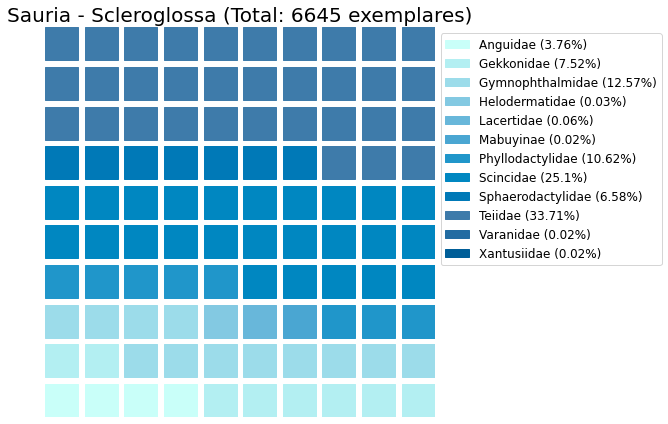

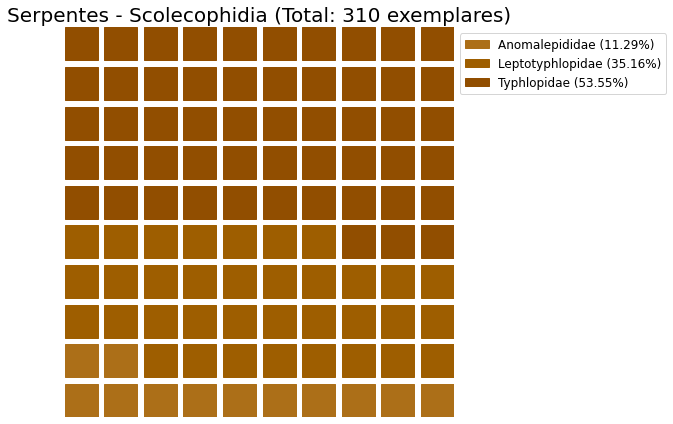

In [96]:
for i in range(len(grupos)-1):
    
    # 1. filtrar tabela por grupo
    temp = NewTable[NewTable['grupo'] == f'grupo {i+1}'].copy()

    # 2. calcular percentagens
    percent = calcPercentages(temp, col='familia')

    # 3. identificar cores
    percent['cores'] = percent['familia'].apply(lambda x: cores_familia[x])

    # ordenando percentuais
#     percent.sort_values('percent', inplace=True)
    total = percent['counts'].sum()
    
    # nome do grupo para exibição
    nome = nomes_grupos[f'grupo {i+1}']
    
    # standard figure
    fig1 = plt.figure(
        FigureClass=Waffle, 
        rows=10, 
    #     columns=10, 
    #     rounding_rule='nearest',
        values=[j for j in percent['percent']],
        colors=list(percent['cores']),
        title={
            'label': f'{nome} (Total: {total} exemplares)', 
            'loc': 'center',
            'fontdict': {
                'fontsize':20
            }
        },
        labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['familia'], percent['percent'])],
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1), 'fontsize':12},
        icon_size=18,
        vertical= True,
        icon_legend=True,
    #     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
        figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
    )

#     plt.savefig(f'./graphs/waffles/grupos/grupo{i+1}.svg')
    plt.savefig(f'./graphs/waffles/grupos/grupo{i+1}.png')

# plt.show()

<br>

-----

### 2- Orders per family

In [12]:
family_counts = NewTable['familia'].value_counts().reset_index()
family_counts.columns = ['familia', 'count']

In [13]:
NewTable.sort_values('ordem', inplace=True)

In [14]:
NewTable[NewTable['familia'] == '#n/d']['ordem']

22062    Serpentes
1333           NaN
Name: ordem, dtype: object

In [15]:
d = defaultdict()

index=0
for family in NewTable['familia'].unique():
    
    # comentar na reunião (ordem Caudata e Serpentes)
    if family == 'Nan' or family == '#n/d' or family == 'Plethodontidae':
        continue
    # filtrando a base e calculando percentuais
    temp = calcPercentages(NewTable[NewTable['familia']==family], col='ordem')
    temp.sort_values('percent', inplace=True)
    temp = temp[temp['ordem'].isin(ordens)]
    
    # criando coluna de cores
    temp['cores'] = temp['ordem'].apply(lambda x:cores_ordem[x])
    
    # contagem
    count = family_counts[family_counts['familia'] == family]['count'].values[0] 
       
    index +=1
    
    #dict for chart
    d[(5,10,index)]= { 
        'rows':10, 
    #     columns=10, 
    #     rounding_rule='floor',
        'values':list(temp['percent']),
        'colors':list(temp['cores']),
        # p.s.: thousands separator is: ,
        'title':{
            'label': f'Família: {family}\nTotal de registros: {count}'.replace(',','.'),
            'loc': 'left', 'fontsize':18},
        'icon_legend':True,
    }
        
d = dict(d)
# d

#### Making `waffle charts`

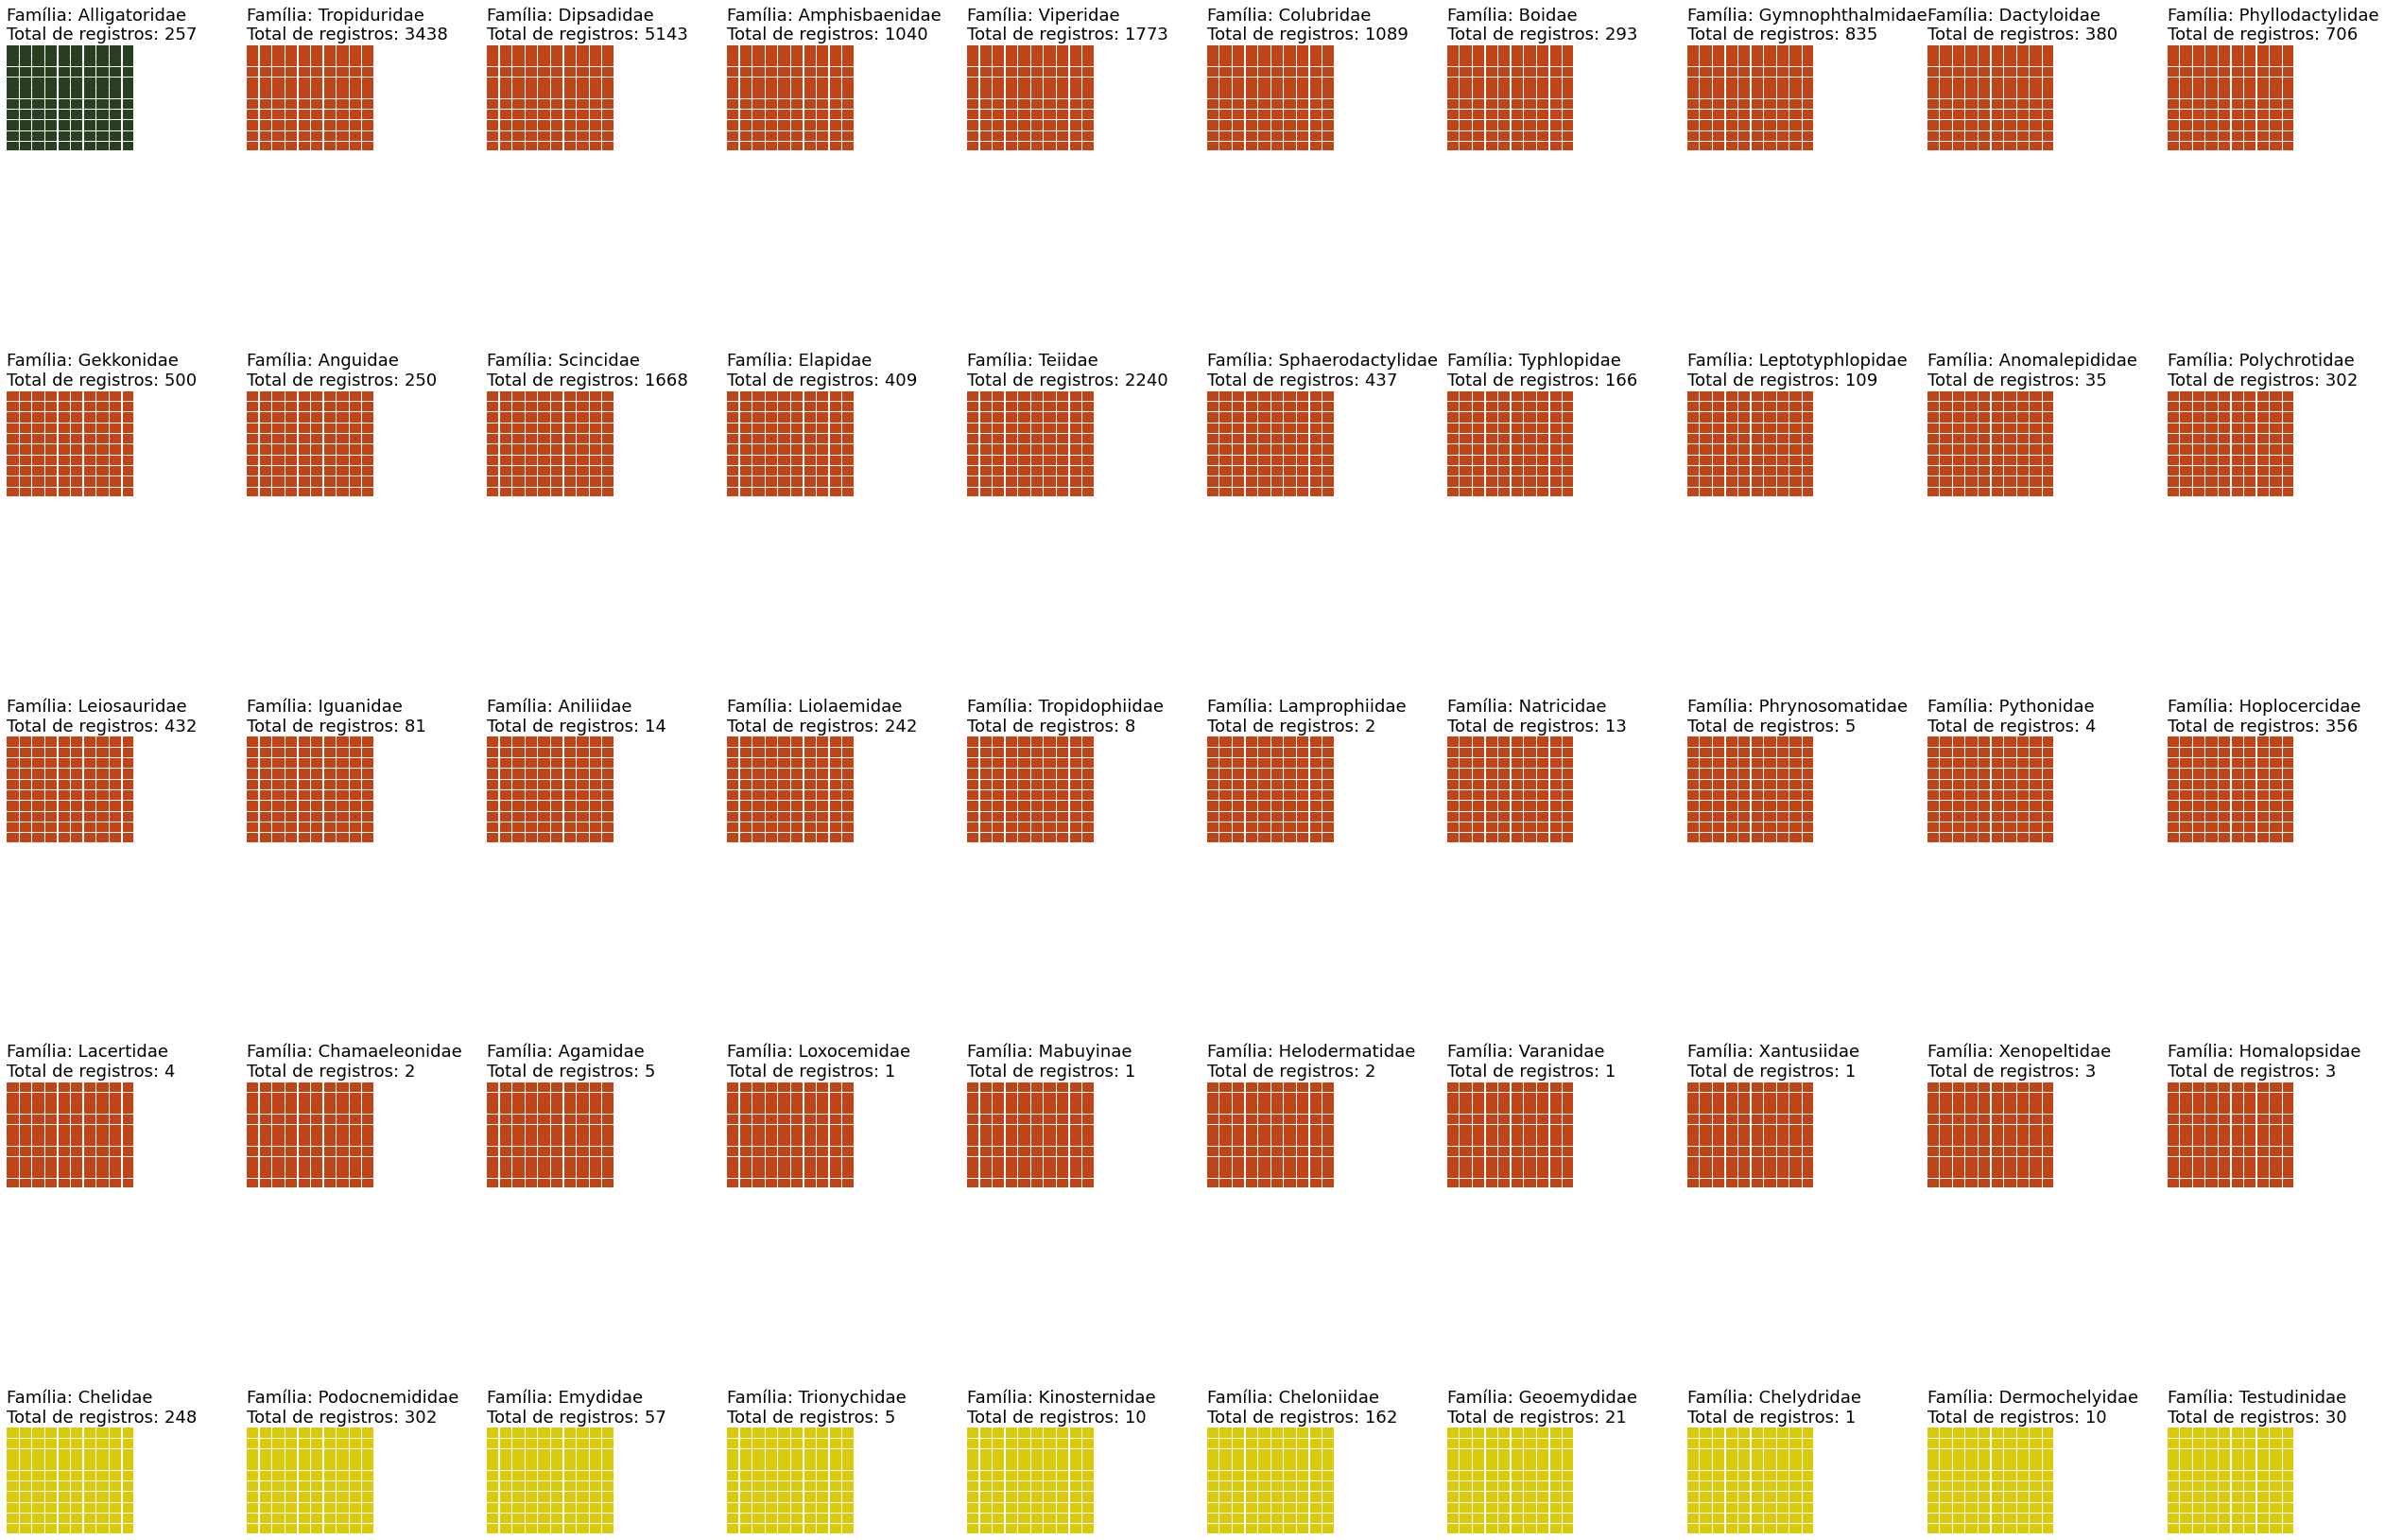

In [16]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
#     columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
    
)

# saving charts
# plt.savefig('./graphs/waffles/familias.svg')
plt.savefig('./graphs/waffles/familias.png')

<br>

**The end!**

-----

In [19]:
# for col in NewTable.columns:
#     print('-', col)

In [68]:
# contar quantas ordens diferentes tem por familia

d = defaultdict()
for family in NewTable['familia'].unique():
    d[family] = NewTable[NewTable['familia'] == family]['ordem'].nunique()

In [69]:
# dict(d)

{'Chelidae': 1,
 'Helodermatidae': 1,
 'Amphisbaenidae': 1,
 'Colubridae': 1,
 'Boidae': 1,
 'Viperidae': 1,
 'Natricidae': 1,
 'Elapidae': 1,
 'Emydidae': 1,
 'Trionychidae': 1,
 'Chelydridae': 1,
 'Kinosternidae': 1,
 'Dipsadidae': 1,
 'Nan': 1,
 'Agamidae': 1,
 'Scincidae': 1,
 'Gekkonidae': 1,
 'Phyllodactylidae': 1,
 'Typhlopidae': 1,
 'Leptotyphlopidae': 1,
 'Teiidae': 1,
 'Polychrotidae': 1,
 'Hoplocercidae': 1,
 'Anguidae': 1,
 'Cheloniidae': 1,
 'Phrynosomatidae': 1,
 'Aniliidae': 1,
 'Podocnemididae': 1,
 'Geoemydidae': 1,
 'Gymnophthalmidae': 1,
 'Tropiduridae': 1,
 'Leiosauridae': 1,
 'Alligatoridae': 1,
 'Sphaerodactylidae': 1,
 'Iguanidae': 1,
 '#n/d': 1,
 'Liolaemidae': 1,
 'Testudinidae': 1,
 'Dermochelyidae': 1,
 'Mabuyinae': 1,
 'Dactyloidae': 1,
 'Tropidophiidae': 1,
 'Anomalepididae': 1,
 'Chamaeleonidae': 1,
 'Plethodontidae': 1,
 'Homalopsidae': 1,
 'Xenopeltidae': 1,
 'Lamprophiidae': 1,
 'Pythonidae': 1,
 'Xantusiidae': 1,
 'Varanidae': 1,
 'Loxocemidae': 1,
 'L